Do the following on the dataset

1. Load the data into the pandas environment and identify some basic details of the
dataset.

2. Reset the index as "name".

3. Select rows for specific names Jack Morgan and Josh wills.

4. Select data for multiple values "Sales" and “Finance”.

5. Display employee who has more than 700 performance score.

6. Display employee who has more than 500 and less than 700 performance score

7. Check and handle missing values in the dataset.

8. Check the outliers and handle outliers in performance score using Percentiles.

9. Check the gender column and do Dummy encoding.

10.Do the standard scaling on the feature performance score.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the data into the pandas environment and identify some basic details of the dataset.

In [2]:
df=pd.read_csv("employee.csv")

In [3]:
df

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [4]:
df.shape

(9, 7)

data set having 9 rows and 7 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [7]:
df.describe()

,age,income,performance_score
count,7.000000,7.000000,9.000000
mean,40.428571,52857.142857,610.666667
std,12.204605,26028.372797,235.671912
min,23.000000,16000.000000,53.000000
25%,31.000000,38500.000000,556.000000
50%,45.000000,52000.000000,674.000000
75%,49.500000,63500.000000,711.000000
max,54.000000,98000.000000,901.000000


In [8]:
df.isna().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

we are having 2 null values present in each of the age, income and gender column

In [9]:
df.dtypes

name                  object
age                  float64
income               float64
gender                object
department            object
grade                 object
performance_score      int64
dtype: object

In [10]:
df.nunique()

name                 9
age                  5
income               7
gender               2
department           3
grade                4
performance_score    9
dtype: int64

# 2. Reset the index as "name".

In [11]:
df.head(2)

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520


In [12]:
df.set_index('name',inplace=True)

In [13]:
df.head()

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


# 3. Select rows for specific names Jack Morgan and Josh wills.

In [15]:
df.loc[['Jack Morgan','Josh Wills']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


# 4. Select data for multiple values "Sales" and “Finance”

In [16]:
df.loc[df['department'].isin(['Sales','Finance'])]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 5. Display employee who has more than 700 performance score.

In [17]:
df[df['performance_score']>700]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


# 6. Display employee who has more than 500 and less than 700 performance score

In [24]:
df[(df['performance_score']>500)&(df['performance_score']<700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


# 7. Check and handle missing values in the dataset.

<AxesSubplot:ylabel='name'>

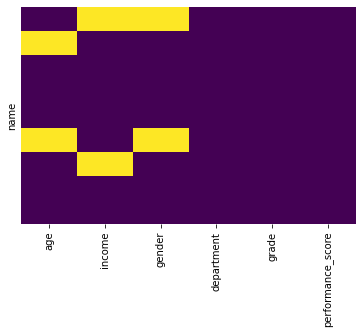

In [27]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Age,income,gender columns having some missing values

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

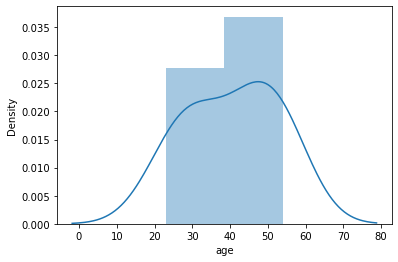

In [30]:
sns.distplot(df['age'])

it is a normal distribution

(array([1., 0., 2., 0., 0., 0., 0., 2., 0., 2.]),
 array([23. , 26.1, 29.2, 32.3, 35.4, 38.5, 41.6, 44.7, 47.8, 50.9, 54. ]),
 <BarContainer object of 10 artists>)

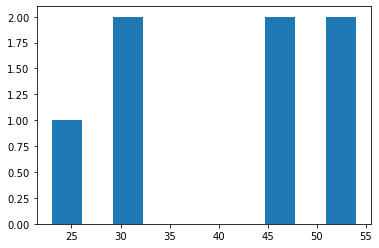

In [31]:
plt.hist(df['age'])

we will fill the missing value of age with the mean

In [32]:
df['age']=df['age'].fillna(df['age'].mean())

In [33]:
df.isna().sum()

age                  0
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

(array([1., 0., 1., 1., 1., 2., 0., 0., 0., 1.]),
 array([16000., 24200., 32400., 40600., 48800., 57000., 65200., 73400.,
        81600., 89800., 98000.]),
 <BarContainer object of 10 artists>)

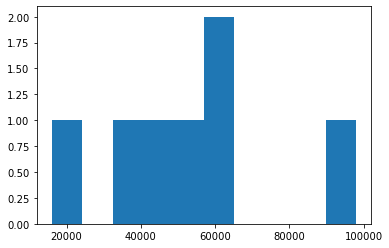

In [34]:
plt.hist(df['income'])

<AxesSubplot:xlabel='income'>

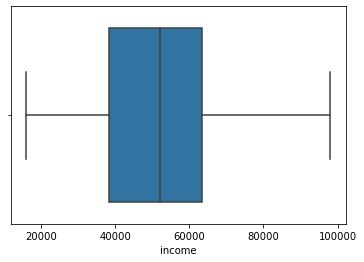

In [36]:
sns.boxplot(data=df,x='income')

continous variable with no outliers.
we use mean to filling of missing values

In [40]:
df['income']=df['income'].fillna(df['income'].mean())

<AxesSubplot:xlabel='gender', ylabel='count'>

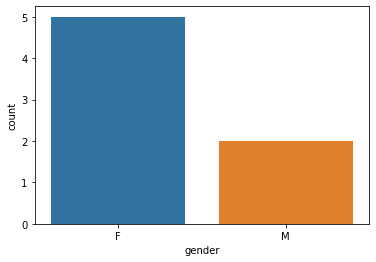

In [39]:
sns.countplot(data=df,x='gender')

In this categorical variable we will fill the missing values with mode

In [43]:
df.gender.mode()

0    F
Name: gender, dtype: object

In [44]:
df['gender']=df['gender'].fillna(df['gender'].mode()[0])

In [45]:
df.isna().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

<AxesSubplot:ylabel='name'>

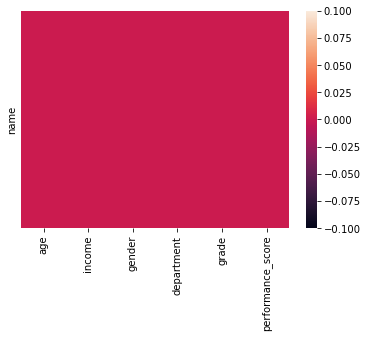

In [46]:
sns.heatmap(df.isnull(),yticklabels=False)

we are successfully handled the missing values

# 8. Check the outliers and handle outliers in performance score using Percentiles.

In [47]:
df.head()

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.000000,52857.142857,F,Operations,G3,723
S Kumar,40.428571,16000.000000,F,Finance,G0,520
Jack Morgan,32.000000,35000.000000,M,Finance,G2,674
Ying Chin,45.000000,65000.000000,F,Sales,G3,556
Dheeraj Patel,30.000000,42000.000000,F,Operations,G2,711


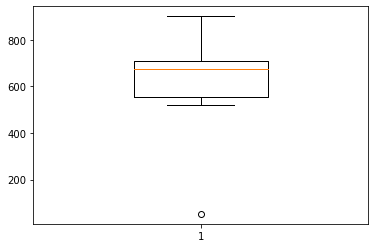

In [48]:
plt.figure()
plt.boxplot(df['performance_score'],widths=0.4)
plt.show()

There is some outliers in performance column

In [49]:
Q1=np.percentile(df['performance_score'],25,interpolation='midpoint')
Q2=np.percentile(df['performance_score'],50,interpolation='midpoint')
Q3=np.percentile(df['performance_score'],75,interpolation='midpoint')
IQR=Q3-Q1
lw=Q1-1.5*IQR
up=Q3+1.5*IQR

In [50]:
print(lw)
print(up)

323.5
943.5


In [51]:
outlier=[]
for x in df['performance_score']:
    if((x>up)or(x<lw)):
        outlier.append(x)

In [52]:
outlier

[53]

In [54]:
indx=df['performance_score']<lw
df.loc[indx].index

Index(['James Authur'], dtype='object', name='name')

In [55]:
df.drop(['James Authur'],inplace=True)

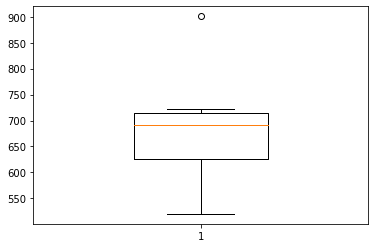

In [56]:
plt.figure()
plt.boxplot(df['performance_score'],widths=0.4)
plt.show()

In [57]:
#we have remove the outlier from performance_score column.

# 9. Check the gender column and do Dummy encoding.

In [58]:
df.dtypes

age                  float64
income               float64
gender                object
department            object
grade                 object
performance_score      int64
dtype: object

gender is categorical variable.we will perforn one hot encoding, so that we will be able to do  numerical calculations by them

In [59]:
df=pd.get_dummies(df,columns=['gender'],drop_first=True)

In [60]:
df

,age,income,department,grade,performance_score,gender_M
name,,,,,,
Allen Smith,45.000000,52857.142857,Operations,G3,723,0
S Kumar,40.428571,16000.000000,Finance,G0,520,0
Jack Morgan,32.000000,35000.000000,Finance,G2,674,1
Ying Chin,45.000000,65000.000000,Sales,G3,556,0
Dheeraj Patel,30.000000,42000.000000,Operations,G2,711,0
Satyam Sharma,40.428571,62000.000000,Sales,G3,649,0
Josh Wills,54.000000,52000.000000,Finance,G3,901,0
Leo Duck,23.000000,98000.000000,Sales,G4,709,1


# 10.Do the standard scaling on the feature performance score.

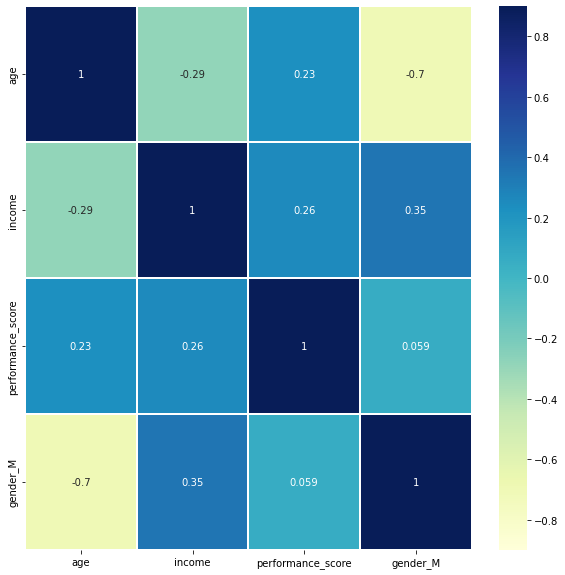

In [61]:
corrmatrix=df.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corrmatrix,vmin=-0.9,vmax=0.9,annot=True,linewidths=0.2,cmap='YlGnBu')
plt.show()

In [62]:
df.columns

Index(['age', 'income', 'department', 'grade', 'performance_score',
       'gender_M'],
      dtype='object')

In [63]:
X=df.drop(['performance_score','department','grade'],axis=1)
Y=df['performance_score']

In [64]:
X.describe()

,age,income,gender_M
count,8.000000,8.000000,8.00000
mean,38.732143,52857.142857,0.25000
std,9.903157,24097.590700,0.46291
min,23.000000,16000.000000,0.00000
25%,31.500000,40250.000000,0.00000
50%,40.428571,52428.571429,0.00000
75%,45.000000,62750.000000,0.25000
max,54.000000,98000.000000,1.00000


In [65]:
type(X)

pandas.core.frame.DataFrame

In [66]:
#performing standard scaler operation

In [67]:
from sklearn import preprocessing

In [68]:
standardization=preprocessing.StandardScaler()
X=standardization.fit_transform(X)

In [69]:
X=pd.DataFrame(X)

In [70]:
X.describe()

,0,1,2
count,8.000000e+00,8.000000e+00,8.000000e+00
mean,-3.608225e-16,1.110223e-16,-2.775558e-17
std,1.069045e+00,1.069045e+00,1.069045e+00
min,-1.698283e+00,-1.635099e+00,-5.773503e-01
25%,-7.807092e-01,-5.592925e-01,-5.773503e-01
50%,1.831293e-01,-1.901278e-02,-5.773503e-01
75%,6.766146e-01,4.388783e-01,0.000000e+00
max,1.648164e+00,2.002679e+00,1.732051e+00
